  x        u(x)           estimated error
 -1.00       0.00000000        0.0e+00
 -0.98      -0.00636201        6.8e-11
 -0.96      -0.01269891        8.8e-12
 -0.94      -0.01898570        6.4e-11
 -0.92      -0.02519755        6.9e-11
 -0.90      -0.03130997        1.1e-10
 -0.88      -0.03729881        5.0e-10
 -0.86      -0.04314046        1.6e-10
 -0.84      -0.04881185        5.4e-10
 -0.82      -0.05429060        4.6e-11
 -0.80      -0.05955510        8.6e-10
 -0.78      -0.06458454        8.3e-10
 -0.76      -0.06935912        1.9e-10
 -0.74      -0.07385996        2.0e-10
 -0.72      -0.07806930        1.1e-09
 -0.70      -0.08197056        1.2e-09
 -0.68      -0.08554830        7.5e-11
 -0.66      -0.08878843        9.8e-10
 -0.64      -0.09167814        3.1e-10
 -0.62      -0.09420605        1.3e-09
 -0.60      -0.09636217        3.5e-10
 -0.58      -0.09813799        2.7e-10
 -0.56      -0.09952651        3.4e-10
 -0.54      -0.10052224        7.0e-11
 -0.52      -0.1011212

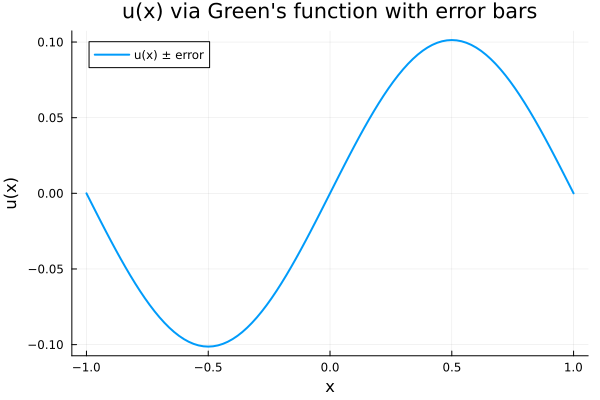

In [42]:
using QuadGK
using Plots
using Printf

# Define the source function f(y)
f(y) = sin(pi * y)

# Define the Green's function kernel k(x, y)
function k(x, y)
    if x < y
        return 0.5 * (1 - y) * (x + 1)
    else
        return 0.5 * (1 + y) * (1 - x)
    end
end

# Compute u(x) = ∫ k(x, y) f(y) dy with error estimate
function u_and_error(x)
    integrand(y) = k(x, y) * f(y)
    val, err = quadgk(integrand, -1.0, 1.0)
    return val, err
end

# Sample x and collect values
x_vals = -1:0.02:1  
u_vals = Float64[]
u_errs = Float64[]

println("  x        u(x)           estimated error")
println("==========================================")
for x in x_vals
    val, err = u_and_error(x)
    push!(u_vals, val)
    push!(u_errs, err)
    @printf("%6.2f   %14.8f   %12.1e\n", x, val, err)
end

# Optional: plot with error ribbon
plot(x_vals, u_vals,
     ribbon = u_errs,
     label = "u(x) ± error",
     xlabel = "x",
     ylabel = "u(x)",
     title = "u(x) via Green's function with error bars",
     lw = 2)

In [2]:
u_and_error(0.1)

(0.03130996766023503, 1.1294772079694249e-10)

In [3]:
f(0.1)

0.3090169943749474

In [4]:
using LinearAlgebra
using Plots

# Define the target function
A(x, y) = cos(x * sin(y))

A (generic function with 1 method)

In [5]:
n = 5 # number of points chosen

# Create a grid of points
x_vals = range(-1, 1, length=n)
y_vals = range(-1, 1, length=n)

points = [(x, y) for x in x_vals, y in y_vals]
points = vec(points)  # flatten 2D to 1D vector of tuples

N = length(points)

25

In [6]:
# Compute a two dimensional Vandermonde matrix for this system

V_x = x_vals .^ (0:n-1)'
V_y = y_vals .^ (0:n-1)'

V = kron(V_y, V_x)
V

25×25 Matrix{Float64}:
 1.0  -1.0  1.0   -1.0    1.0     -1.0  …  1.0       -1.0        1.0
 1.0  -0.5  0.25  -0.125  0.0625  -1.0     0.25      -0.125      0.0625
 1.0   0.0  0.0    0.0    0.0     -1.0     0.0        0.0        0.0
 1.0   0.5  0.25   0.125  0.0625  -1.0     0.25       0.125      0.0625
 1.0   1.0  1.0    1.0    1.0     -1.0     1.0        1.0        1.0
 1.0  -1.0  1.0   -1.0    1.0     -0.5  …  0.0625    -0.0625     0.0625
 1.0  -0.5  0.25  -0.125  0.0625  -0.5     0.015625  -0.0078125  0.00390625
 1.0   0.0  0.0    0.0    0.0     -0.5     0.0        0.0        0.0
 1.0   0.5  0.25   0.125  0.0625  -0.5     0.015625   0.0078125  0.00390625
 1.0   1.0  1.0    1.0    1.0     -0.5     0.0625     0.0625     0.0625
 1.0  -1.0  1.0   -1.0    1.0      0.0  …  0.0       -0.0        0.0
 1.0  -0.5  0.25  -0.125  0.0625   0.0     0.0       -0.0        0.0
 1.0   0.0  0.0    0.0    0.0      0.0     0.0        0.0        0.0
 1.0   0.5  0.25   0.125  0.0625   0.0     0.0        

In [7]:
# Evaluate function at grid points
b = [A(x, y) for (x, y) in points]

# Solve V * c = b
c = V \ b

25-element Vector{Float64}:
  1.0
 -9.637352644315599e-20
 -4.433182216385173e-18
  9.637352644315599e-20
 -1.9274705288631191e-19
  4.625929269271485e-18
  1.927470528863119e-19
 -5.011423375044109e-18
 -1.927470528863119e-19
  3.854941057726238e-19
 -2.8912057932946783e-19
 -2.8912057932946783e-19
 -0.49493609493929597
  2.8912057932946783e-19
  0.0048674503024828605
 -4.625929269271485e-18
 -1.927470528863119e-19
  5.011423375044109e-18
  1.927470528863119e-19
 -3.854941057726238e-19
  9.637352644315596e-18
  3.854941057726238e-19
  0.14102071930803214
 -3.854941057726238e-19
  0.015414670721661534

In [8]:
function monomial_powers_2d(degree::Int)
    powers = []
    for i in 0:degree
        for j in 0:degree
            push!(powers, (i, j))
        end
    end
    return powers
end

function evaluate_poly(x, y, c, powers)
    result = 0.0
    for (coeff, (i, j)) in zip(c, powers)
        result += coeff * x^i * y^j
    end
    return result
end

evaluate_poly (generic function with 1 method)

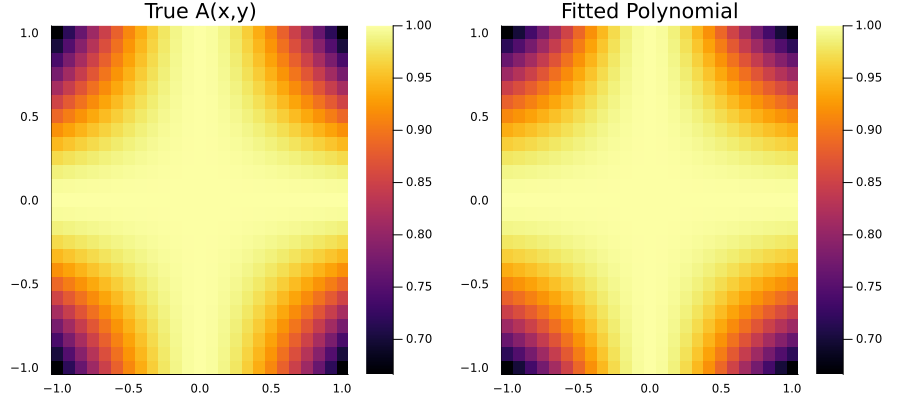

In [9]:
x_grid = range(-1,1,25)
y_grid = range(-1,1,25)
powers = monomial_powers_2d(n-1)


Z_true = [A(x, y) for x in x_grid, y in y_grid]
Z_fit  = [evaluate_poly(x, y, c, powers) for x in x_grid, y in y_grid]
size(Z_true)
plot(
    heatmap(x_grid, y_grid, Z_true', title="True A(x,y)"),
    heatmap(x_grid, y_grid, Z_fit', title="Fitted Polynomial"),
    layout=(1, 2), size=(900, 400)
)

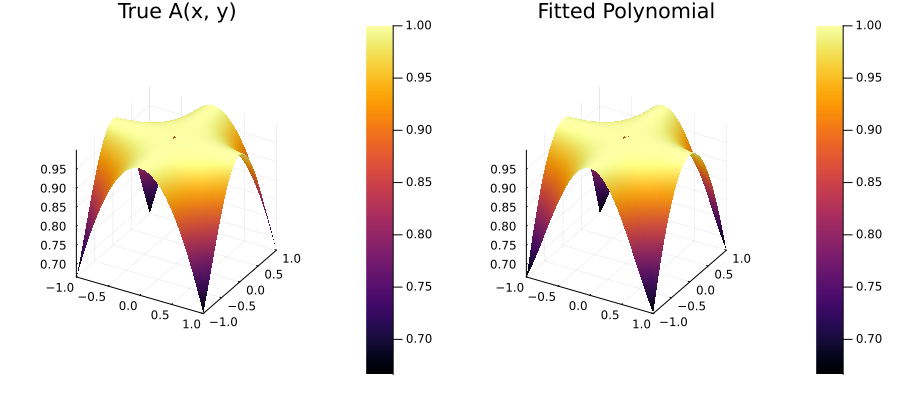

In [10]:
# Surface plot of both functions side by side
plot(
    surface(x_grid, y_grid, Z_true', title="True A(x, y)"),
    surface(x_grid, y_grid, Z_fit', title="Fitted Polynomial"),
    layout=(1, 2), size=(900, 400)
)

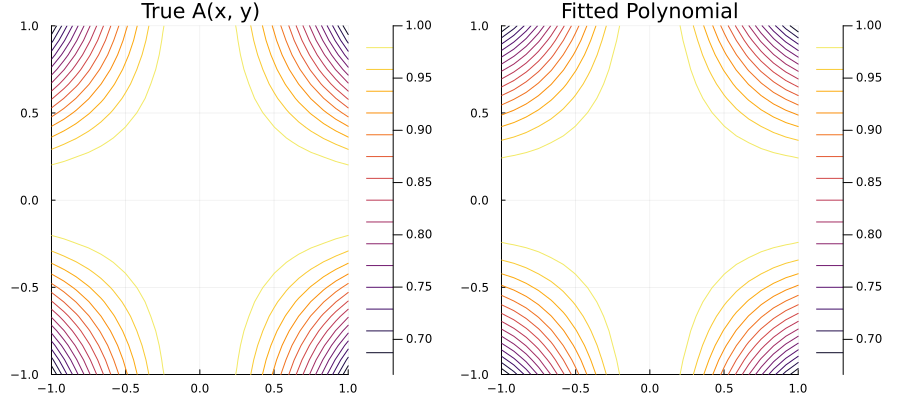

In [11]:
# Contour plots (top-down view)
plot(
    contour(x_grid, y_grid, Z_true', title="True A(x, y)"),
    contour(x_grid, y_grid, Z_fit', title="Fitted Polynomial"),
    layout=(1, 2), size=(900, 400)
)

## Least Squares Regression

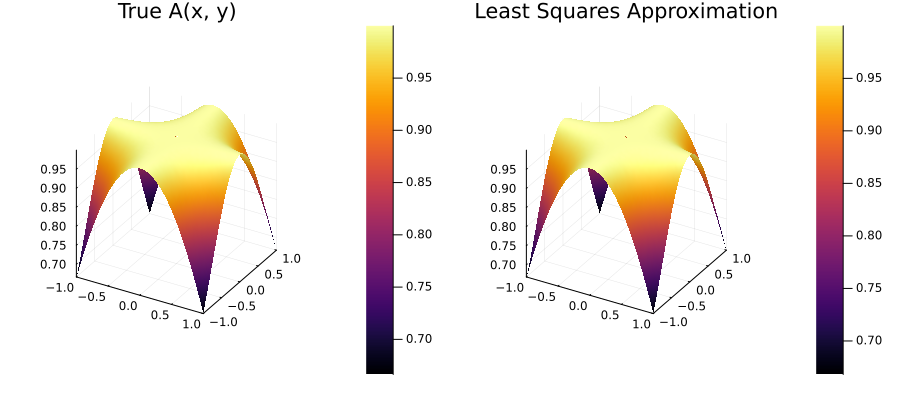

In [12]:
using Plots
x_grid2 = range(-1,1,50)
y_grid2 = range(-1,1,50)
least_squares_points = [(x,y) for x in x_grid2, y in y_grid2]
b = [A(x, y) for (x, y) in vec(least_squares_points)]
V_y = y_grid2 .^ (0:n)'
V_x = x_grid2 .^ (0:n)'
V = kron(V_y, V_x)
c = V \ b
Z_true2 = [A(x, y) for x in x_grid2, y in y_grid2]
plot(
    surface(x_grid2, y_grid2, Z_true2', title="True A(x, y)"),
    surface(x_grid2, y_grid2, V*c, title = "Least Squares Approximation"),
    layout=(1, 2), size=(900, 400)
    )

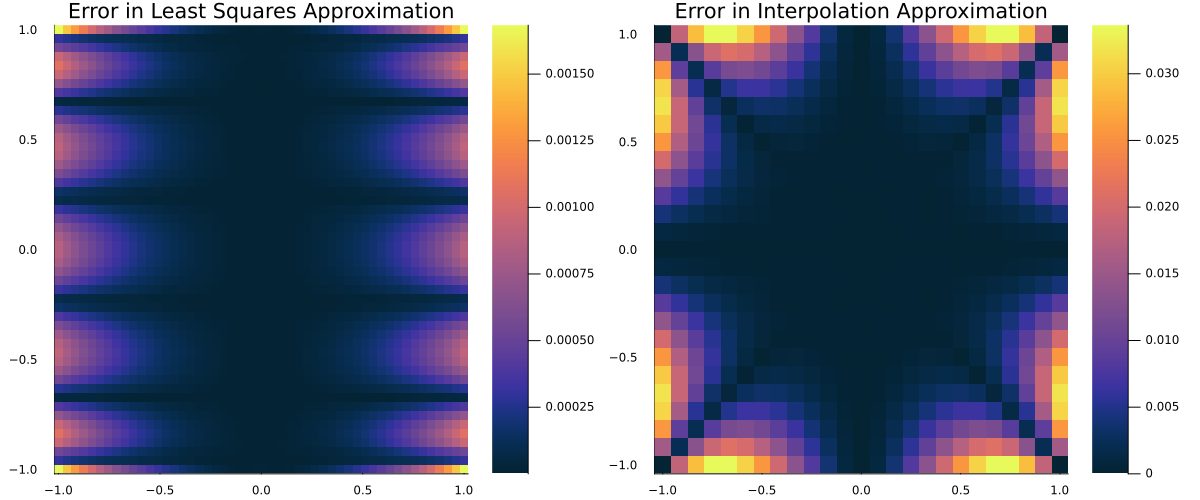

In [13]:
Z_least_squares = reshape(V*c, 50, 50)
plot(
    heatmap(x_grid2, y_grid2, abs.(Z_true2' - Z_least_squares'), title = "Error in Least Squares Approximation", c = :thermal),
    heatmap(x_grid, y_grid, abs.(Z_true' - Z_fit'), title = "Error in Interpolation Approximation", c = :thermal),
    layout=(1, 2), size=(1200, 500)
    )

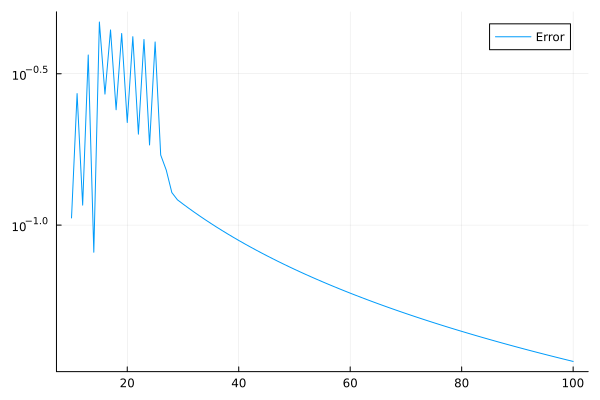

In [14]:
ns = 10:100
errs = []
for z in ns
    x_grid = range(-1, 1, z)
    y_grid = range(-1, 1, z)
    powers = monomial_powers_2d(z-1)
    Z_true = [A(x, y) for x in x_grid, y in y_grid]
    Z_fit  = [evaluate_poly(x, y, c, powers) for x in x_grid, y in y_grid]
    reshape(Z_true, z^2, 1)
    reshape(Z_fit, z^2, 1)
    # choose a sample point in each 
    push!(errs, abs(Z_true[z - 3] - Z_fit[z - 3]))
end
errs
plot(ns, errs; yscale=:log10, label = "Error")

## Using Finite Differences to Calculate $K(x,y)$

$\frac{\partial^2}{\partial x^2} K(x,y) + x^2K(x,y) = \delta_y$

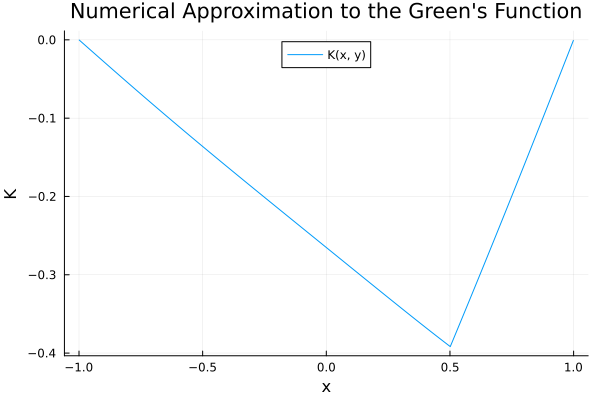

In [15]:
using LinearAlgebra
using Plots

n = 2000
x = range(-1, 1; length=n+2)
h = step(x)
x_inner = x[2:n+1]   # n interior points
# Define the potential V(x) = x^2
Z = x_inner.^2
T = SymTridiagonal(ones(n).*(-2/h^2 .+ Z),ones(n-1)*1/h^2)
# Right-hand side: approximate δ(x - y) at y
f_2 = zeros(n)
y = 0.5
i_y = argmin(abs.(x.-y))  # index closest to y
f_2[i_y] = 1/h  # spike approximating δ

K = T \ f_2 # if it's supposed to be -u''

plot(x_inner, K, label = "K(x, y)", xlabel = "x", ylabel = "K", title = "Numerical Approximation to the Green's Function", legend = :top)

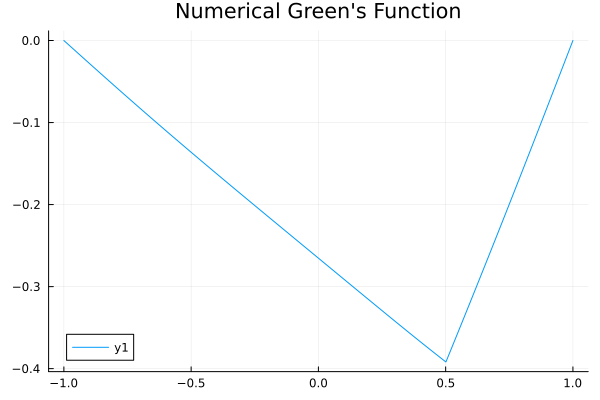

In [16]:
function greens(n) # gives a Green's Function for u'' + x^2 u = δ(x-y)
    h = step(x) # set our small value
    Z = x[2:n].^2 # define the potential (coefficient of u)
    T = SymTridiagonal(ones(n-1).*(-2/h^2 .+ Z), ones(n-2)*1/h^2) # finite difference matrix
    y = 0.5 # location of spike for the δ function
    f = zeros(n-1)
    i_y = argmin(abs.(x.-y)) # find the closest sampled point to the spike
    f[i_y] = 1/h # spike approximating δ
    u = T \ f # solve Tu = f
    return [0; u; 0]
end
n = 2000
x = range(-1, 1; length = n+1)
plot(x, greens(n), title = "Numerical Green's Function")

## Polynomial approximation- Lorenzo- Cubic

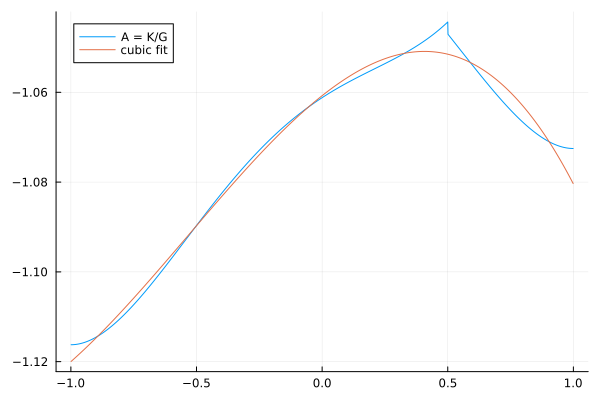

In [17]:
using LinearAlgebra, Plots

# Compute the numerical Green's function for fixed y=y_0 : JUST A SLICE

n = 2000
K_full = greens(n)                  # length = n+1
m = length(K_full)                  # m = n+1

#  Build the x–grid of length m on [-1, 1]
x_full    = LinRange(-1, 1, m)      # also length m
x_inner   = x_full[2:end-1]         # length m-2 (dropping 2 endpoints)
K_vec     = K_full[2:end-1]         # length m-2 (dropping 2 zeros of endpoints)

# Analytical G at y = y_0
y0 = 0.5
function analytic_G(x,y)
    if x ≤ y
        return 0.5*(1-y)*(1+x)
    else
        return 0.5*(1+y)*(1-x)
    end
end
G_vec     = [analytic_G(xi, y0) for xi in x_inner]

# Form A_vec
A_vec     = K_vec ./ G_vec

# Build degree 3 Vandermonde
p = 3
V = hcat([x_inner .^ k for k in 0:p]...)   # size (m-2)x4

# Solve least-squares
c = V \ A_vec # gives 4 coefficients c[1]…c[4]

# Define cubic fit
fitA(x) = sum(c[k+1]*x^k for k in 0:p)

# Plot
plot(x_inner, A_vec, label="A = K/G")
plot!(x_inner, fitA.(x_inner), label="cubic fit")



In [18]:
# return polynomial as string
terms = [ "$(c[i])*x^$(i-1)" for i in 1:length(c) ]
poly_str = join(terms, " + ")
println("P(x) = $poly_str")

P(x) = -1.0607476456908254*x^0 + 0.04435417374328547*x^1 + -0.03946184734617374*x^2 + -0.024565533047405927*x^3


# INCORRECT CODE- DO NOT SUBMIT

using LinearAlgebra, Plots, SparseArrays

# x and y grids
n = 2000
m = length(greens(n))        # m = n+1
x_full = LinRange(-1, 1, m)
x_inner = x_full[2:end-1]    # drop boundaries
y_full = LinRange(-1, 1, m)
y_inner = y_full[2:end-1]

# Sample A(x_j,y_k) on x-y interior grid
N = length(x_inner)
M = length(y_inner)
A_mat = zeros(N, M)


function analytic_G(x, y)
    if x ≤ y
        return 0.5 * (1 - y) * (1 + x)
    else
        return 0.5 * (1 + y) * (1 - x)
    end
end


for (k, y0) in enumerate(y_inner)
    K_full = greens(n)
    K_vec = K_full[2:end-1]
    G_vec = [analytic_G(xi, y0) for xi in x_inner]
    A_mat[:, k] = K_vec ./ G_vec
end

# build 2 1D Vandermondes
p = 10
Vx = hcat([x_inner .^ k for k in 0:p]...) # size (m-2)x4
Vy = hcat([y_inner .^ k for k in 0:p]...) # size (m-2)x4

# 4. Build the full 2D Vandermonde via Kronecker
V2d = kron(Vy, Vx)               # size (N*M)×16

# 5. Flatten A_mat into one vector
f_vec = vec(A_mat)               # length N*M

# 6. Solve the global least‐squares
a = V2d \ f_vec                  # 16 coefficients

# 7. Define the fitted bivariate polynomial
function A_fit(x, y)
    s, idx = 0.0, 1
    for j in 0:p
        for i in 0:p
            s += a[idx] * x^i * y^j
            idx += 1
        end
    end
    return s
end

# 8. Visual check at y0 = 0.5
y0 = 0.5
col = findfirst(z -> isapprox(z, y0; atol=1e-6), y_inner)
A_data = A_mat[:, col]
plot(x_inner, A_data, label="A(x,y=0.5) data")
plot!(x_inner, A_fit.(x_inner, y0), label="2D cubic fit")
xlabel!("x");
ylabel!("A");
title!("Global 2D Cubic Fit");


# INCORRECT CODE- DO NOT SUBMIT


using Plots

# raw grid transposed to size (M×N)
Z_data = A_mat'  

# grid evaluated with fitted polynomial
Z_fit = [ A_fit(xi, yj) for yj in y_inner, xi in x_inner ]  # also M×N


plot(
  layout = (1,2),
  size   = (900,400),
  xtickfont = font(5),  # make x-tick labels smaller
  ytickfont = font(5),  # make y-tick labels smaller
  ztickfont = font(8),  # make z-tick labels smaller
  guidefont = font(10)  # axis titles a bit larger than ticks
)

surface!(
  x_inner, y_inner, Z_data;
  subplot   = 1,
  title     = "Sampled A(x,y)",
  xlabel    = "x", ylabel="y", zlabel="A",
  legend    = false
)

surface!(
  x_inner, y_inner, Z_fit;
  subplot   = 2,
  title     = "2D Cubic Fit",
  xlabel    = "x", ylabel="y", zlabel="A_fit",
  legend    = false
)



# return polynomial
terms = String[]
index = 1
for j in 0:p
    for i in 0:p
        coeff = round(a[index], digits=6)    # apply rounding
        push!(terms, "$(coeff)*x^$(i)*y^$(j)")
        index += 1
    end
end

poly_str = join(terms, " + ")
println("A_fit(x,y) = $poly_str")


## Polynomial Approximation

$K(x,y) = A(x,y)G(x,y) + B(x,y)$

In [19]:
# this should be a linear fit for the two halves of the vector K
f_left = z -> z*(K[1] - K[i_y])/(x[1] - x[i_y]) + (K[1] - K[i_y])/(x[1] - x[i_y])
f_right = z -> z*(K[i_y] - K[n])/(x[i_y] - x[n]) - (K[n] - K[i_y])/(x[n] - x[i_y])
function linear_approx(z)
    if z ≤ y
        return f_left(z)
    elseif z > y
        return f_right(z)
    end
end


linear_approx (generic function with 1 method)

In [20]:
plot(x_inner, K, label = "K(x, y)=0.34)", xlabel = "x", ylabel = "K", title = "Green's Function", legend = :top)
plot!(x_inner, linear_approx, label = "Linear Approximation")

Once we have the analytical Green's Function, we can calculate $\Alpha(x,y)$ using $K $ \ $ G$ on suitable vectors, as we have $K(x,y)$ already known.
We can solve analytically by using the boundary conditions and the fact that the jump discontinuity is 1 at the inflection point.

In [28]:
using SpecialFunctions
function G(x,y) # this is not the correct Green's Function
    if x ≤ y
        return 0.5 * (1 - y) * (1 + x)
    elseif x > y
        return 0.5 * (1 + y) * (1 - x)
    end
end
y = 0.5
G_vec = [G(z,y) for z in x_inner]
#Α = K ./ G_vec


#plot(x_inner, G_vec)
#plot!(x_inner, K)
#plot!(x_inner, Α)

1999-element Vector{Float64}:
 0.00024999999999997247
 0.0004999999999999727
 0.0007499999999999729
 0.0009999999999999731
 0.0012499999999999734
 0.0014999999999999458
 0.0017499999999999738
 0.0019999999999999463
 0.0022499999999999742
 0.0024999999999999467
 0.0027499999999999747
 0.002999999999999975
 0.003249999999999975
 ⋮
 0.009000000000000008
 0.008249999999999924
 0.00749999999999984
 0.006749999999999923
 0.005999999999999839
 0.005249999999999921
 0.0044999999999998375
 0.00374999999999992
 0.0030000000000000027
 0.0022499999999999187
 0.0015000000000000013
 0.0007499999999999174

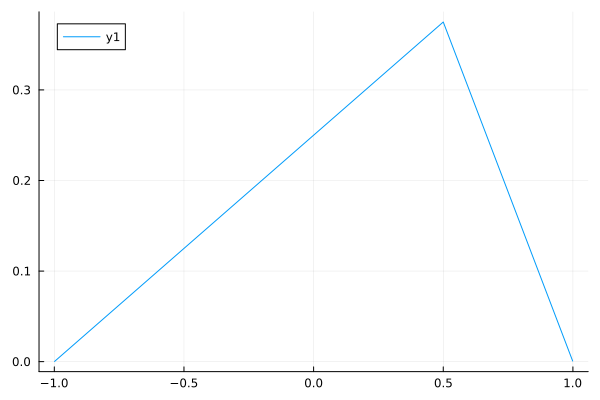

In [29]:
plot(x_inner, G_vec)

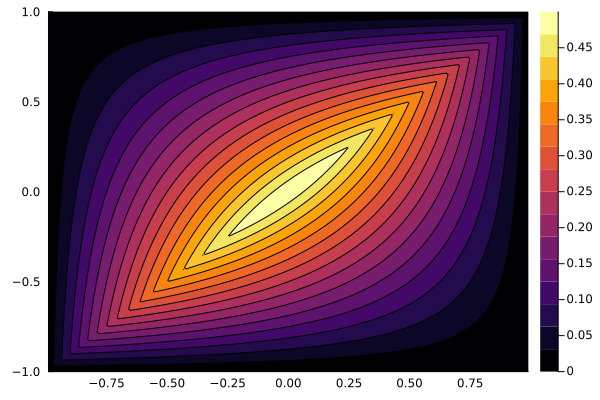

In [30]:
n = 200

x_grid = range(-1,1,n+2)
x_inner = x_grid[2:n+1]

y_grid = range(-1,1,n+2)
y_inner = y_grid[2:n+1]

G_mat = [G(x,y) for x in x_grid, y in y_inner]

plot(
    contourf(y_inner, x_grid , G_mat)
)


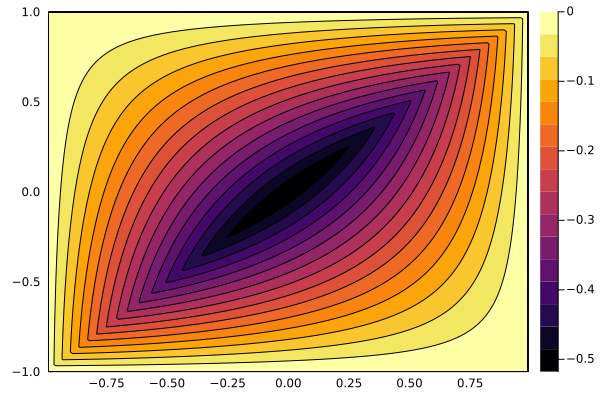

In [31]:
function greens(n, y, x) # gives a Green's Function for u'' + x^2 u = δ(x-y)
    h = step(x) # set our small value
    Z = x[2:n+1].^2 # define the potential (coefficient of u)
    T = SymTridiagonal(ones(n).*(-2/h^2 .+ Z), ones(n-1)*1/h^2) # finite difference matrix
    f = zeros(n+2)
    i_y = argmin(abs.(x.-y)) # find the closest sampled point to the spike
    f[i_y] = 1/h # spike approximating δ
    f_inner = f[2:n+1]
    u = T \ f_inner # solve Tu = f
    return [0; u; 0]
end
n = 200
x_grid = range(-1,1,n+2)
y_grid = range(-1,1,n+2)
y_inner = y_grid[2:n+1]
K = [greens(n, y, x_grid) for y in y_inner]
K = reduce(hcat, K)

plot(
    contourf(y_inner, x_grid, K)
)

As far as I know this is the correct method to find this function $\Alpha(x,y)$, but I do not know how to return a polynomial from this vector. It is also possible that one of these Green's functions is negative whilst it should be positive, but I do not believe this makes a massive difference.

## Two Dimensional Finite Differences

$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial v^2} \implies u_t - u_{xx} - u_{vv} = 0$

To simplify the code, we will assume the steps in $x, v, t$ are all equal.

f = u_t - u_xx, pick a u which satisfies the initial conditions, then check we recover f
$u(t,x) = t(1-x^2)cosy\\
u_t = (1-x^2)cosy\\
u_x = t(1-2x)cosy\\
u_{xx} = -tcosy\\
f = (1-x^2)cosy + tcosy$

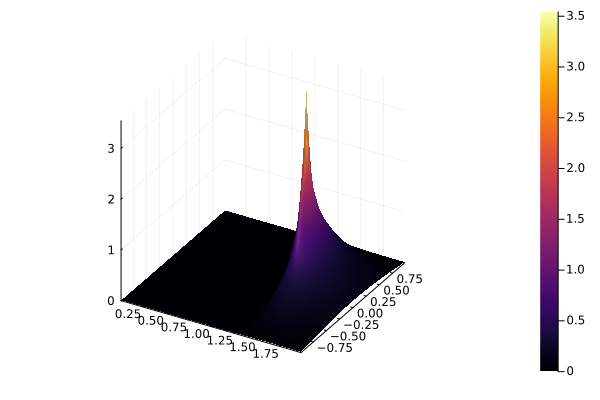

In [32]:
using LinearAlgebra
n = 100
x = range(-1, 1, n+2)
z = range(-1, 1, n+2)
t = range(0, 2, n+2)
h = step(x)
# define the rhs of the equation as δ(τ)δ(y)ᵀ
τ = 1.2
y = 0.4
γ = zeros(n)
i_y = argmin(abs.(x.-y))
i_τ = argmin(abs.(t.-τ))
β = copy(γ)
γ[i_y] = 1/h
β[i_τ] = 1/h
rhs = kron(γ, β)
Dₜ = Bidiagonal(fill(1/h, n), fill(-1/h, n-1), :L)
Dₓ = SymTridiagonal(ones(n)*(-2/h^2), ones(n-1)*1/h^2)

#Dᵥ = SymTridiagonal(ones(n)*(-2/h^2), ones(n-1)*1/h^2)
ṽ = (kron(Matrix(I, 100, 100), Dₜ) - kron(Dₓ, Matrix(I, 100, 100))) \ rhs
plot(
    surface(t[2:n+1], x[2:n+1], ṽ)
)


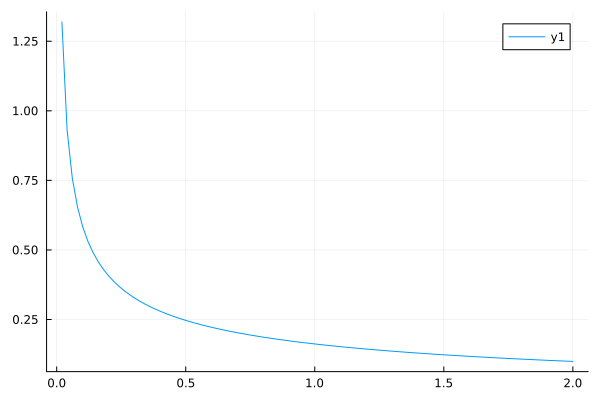

In [37]:
using QuadGK, Test

ϕ(x) = x^2
t = range(0, 2, 100)

function Φ(t, x) 
    return exp.(-x^2/4 .*t)/sqrt.(4*π.*t)
end #this is the known green's function

integrand(y) = ṽ.*ϕ(y)
val, no = quadgk(integrand, -1.0, 1.0)

function u_with_error(t)
    integrand2(y) = Φ(t, y)*ϕ(y)
    trueval, no = quadgk(integrand2, -1.0, 1.0)
    return trueval, no
end

u_vals = []

for t₀ in t[2:100]
    trueval, no = u_with_error(t₀)
    push!(u_vals, trueval)
end

plot(t[2:100], u_vals)
#plot!(t, val)

#trueval = reshape(trueval, 10000, 1)
#@test val[1:90] ≈ trueval[1:90]

In [38]:
using ClassicalOrthogonalPolynomials, Plots, Test

T = ChebyshevT()
C = Ultraspherical(2) # orthogonal wrt (1-x^2)^(3/2)
x = axes(T,1) # quasi-vector for f(x) = x

D₂ = C \ diff(T,2) # second derivative of Chebyshev polynomial
V = C \ (x .^2 .* T) # x^2 * Chebyshev polynomial

q = transform(T, exp) # Chebyshev T coefficients of exp(x)
@test (C * (D₂ * q))[0.1] ≈ exp(0.1) # second derivative of exp at 0.1
@test (C * (V * q))[0.1] ≈ 0.1^2 * exp(0.1) # x^2 * exp(x) at 0.1

Test Passed

In [39]:
L = D₂ + V
@test (C * (L * q))[0.1] ≈ exp(0.1) + 0.1^2 * exp(0.1) # u'' + x^2 *u for u =  exp(x) at 0.1
@test T[[-1,1],:] * q ≈ [exp(-1), exp(1)] # Chebyshev T coefficients of exp at -1 and 1

Test Passed

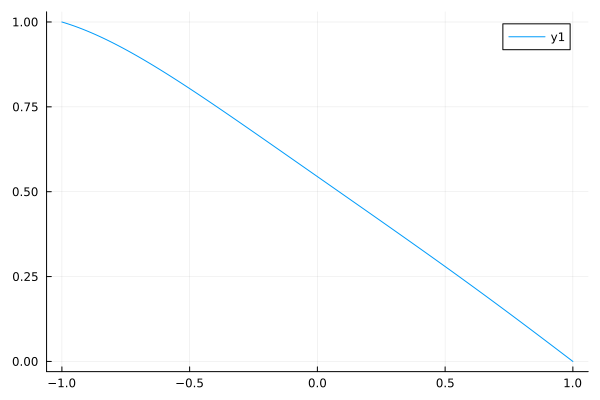

In [40]:
u = [T[[-1,1],:]; L] \ [1; 0; zeros(∞)] # Solve u'' + x^2 * u = 0 with u(-1) = 1, u(1) = 0

plot(T*u)

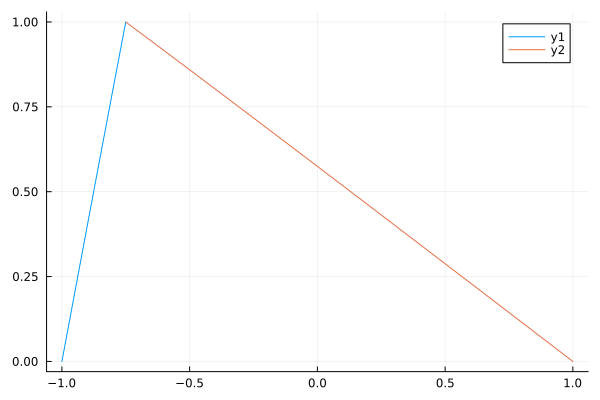

In [41]:
#To use other intervals, we use:

y = -0.75
T = chebyshevt(-1..y)
C = ultraspherical(2,-1..y)

T₂ = chebyshevt(y..1)
C₂ = ultraspherical(2, y..1)

x = axes(T,1) # quasi-vector for f(x) = x
D₂ = C \ diff(T,2) # second derivative of Chebyshev polynomial
V = C \ (x .^2 .* T) # x^2 * Chebyshev polynomial

L = D₂ + V


uₗ = [T[[begin, end],:]; L] \ [0; 1; zeros(∞)] # Solve u'' + x^2 * u = 0 with u(-1) = 0, u(y) = 1
uᵣ = [T₂[[begin, end],:]; L] \ [1; 0; zeros(∞)]

plot(T*uₗ)
plot!(T₂*uᵣ)

#diff(T*uₗ)[y]